# <center> Lecture9 : Bayes Factor </center>  
 
## <center> Instructor: Dr. Hu Chuan-Peng </center> 

## 回顾

上节课我们结合随机点运动范式，使用一个简单线性模型讲了一个相对完整的贝叶斯分析的workflow。

然而，对于贝叶斯推断来说，除了 HDI 以及 HDI+ROPE 外，我们还在第七节课中介绍过另一种在心理学中常用的方式：**贝叶斯因子 (Bayes Factor, BF)**。

![Image Name](https://cdn.kesci.com/upload/sms4lt6fnj.png?imageView2/0/w/720/h/960)



本节课将从心理学的视角，介绍贝叶斯因子的基本概念、优势及其在心理学研究中的应用：

**Outline**

1. 传统假设检验方法
2. 贝叶斯因子基本概念
3. 贝叶斯因子计算与应用
   - Testing against the point-null
   - Testing against a null-region
   - 练习：Directional hypotheses
4. 第二次小作业

## 传统的假设检验方法

🧑‍💻在学习贝叶斯因子前，简单回顾传统统计中的零假设显著性检验（Null Hypothesis Significance Test, NHST）。

频率学派的假设检验主要是基于概率性质的反证法所实现的推论统计方法。即承认如下前提:小概率事件(发生概率小于0.05的事件)在单次抽样中不会发生。

在传统的假设检验框架中，研究者需要根据研究对总体做互斥的两种假设，即零假设$H_0$和备择假设$H_1$：
> **零假设（Null Hypothesis，$H_0$）**：表示没有效应或差异的假设。在许多情况下，零假设代表“无差异”或“无效应”，例如认为两组数据的均值没有显著差异。

> **备择假设（Alternative Hypothesis，$H_1$）**：表示零假设不成立时的假设，通常认为有显著效应或差异。

传统假设检验的核心概念还包括：

- **Alpha（$\alpha$）**：显著性水平，通常设定为 0.05，表示在零假设（$H_0$）成立的情况下，错误拒绝零假设（$H_0$）的概率。换句话说，alpha（$\alpha$）是我们愿意接受的第一类错误概率（假阳性）。
- **$P$值**：是指在零假设成立的前提下，观察到当前或更极端数据的概率。如果 $P$ 值小于等于 $\alpha$，传统统计学的框架下通常会拒绝零假设，认为数据提供了足够的证据支持备择假设。

- 传统的假设检验方法主要依赖于 $P$ 值，这一方法在统计学中应用广泛，但也存在多个问题：
    1. **假阳性结果**：研究者可能会通过操纵p值来达到显著性，如增加样本量或调整变量，这会导致假阳性结果，误导后续研究。    
    2. **忽视效应大小**：$P$ 值无法提供效应大小的信息，仅仅是显著与否的二分判断，不能全面反映数据的实际意义。       
    3. **不考虑先验信息**：传统假设检验忽略了先验知识和理论背景，仅关注数据本身，无法有效利用已有的研究成果。
    4. **无法为直接为零假设提供支持**：不显著结果不代表零假设为真。

<p align="center">
  <img src="https://cdn.kesci.com/upload/smw36cj13b.png?imageView2/0/w/480/h/960" alt="Image Name">
</p>


> 胡传鹏等(2018). 贝叶斯因子及其在JASP中的实现. *心理科学进展* \
> 吴凡, 顾全, 施壮华, 高在峰, 沈模卫. (2018). 跳出传统假设检验方法的陷阱——贝叶斯因子在心理学研究领域的应用. *应用心理学*


<div style="padding-bottom: 50px;"></div>

### 为什么要介绍贝叶斯因子？

与传统假设检验方法相比，贝叶斯因子具有以下几方面的优势：

1. **对假设一视同仁：** 同时评估$H_0$和$H_1$的可能性，能够为$H_0$提供支持证据，解决传统假设检验难以证明$H_0$成立的问题。  
2. **结合先验信息：** 贝叶斯因子分析可以利用先验知识，将前人的研究成果与当前数据结合，提供更为全面的证据评估。       
3. **避免*p*值操纵：** 贝叶斯因子的计算基于全数据集，不受单个数据点的影响，能够有效避免p值操纵带来的假阳性结果。      
4. **支持多模型比较：** 贝叶斯因子不仅适用于二元假设检验，还可以用于比较多个模型的适用性，提供更为灵活的统计分析工具。
5. **可以直接支持零假设**。

> 吴凡, 顾全, 施壮华, 高在峰, 沈模卫. (2018). 跳出传统假设检验方法的陷阱——贝叶斯因子在心理学研究领域的应用. *应用心理学*



## 贝叶斯因子（Bayes Factor，BF）的基本概念

频率学派将随机事件发生的频率作为一种客观指标，而贝叶斯学派则从观察者的视角出发将概率理解为一种主观不确定性。

贝叶斯因子（Bayes Factor，BF）作为一种基于贝叶斯统计的验证方法，主要用于比较零假设（$H_0$）与备择假设（$H_1$）的相对支持程度，其衡量的主要是数据在这两种假设下的解释能力。

具体来说，贝叶斯因子可以表示为：

$$
\begin{align*}
\text{BF}_{10} &= \frac{\text{posterior odds}}{\text{prior odds}} 
&= \frac{P(H_1 | \text{Data})} {P(H_0 | \text{Data})} * \frac {P(H_0)} {P(H_1)} 
&= \frac{P(\text{Data} | H_1)}{P(\text{Data} | H_0)}
\end{align*}
$$

其中，$P(Data | H_1)$ 和 $P(Data | H_0)$ 分别表示在备择假设$H_1$和零假设$H_0$下数据的似然值。

- Posterior odds：后验概率比
- Prior odds：先验概率比
- $H_0$：零假设
- $H_1$：备择假设

> Heck, D. W., Boehm, U., Böing-Messing, F., Bürkner, P.-C., Derks, K., Dienes, Z., Fu, Q., Gu, X., Karimova, D., Kiers, H. A. L., Klugkist, I., Kuiper, R. M., Lee, M. D., Leenders, R., Leplaa, H. J., Linde, M., Ly, A., Meijerink-Bosman, M., Moerbeek, M., … Hoijtink, H. (2023). A review of applications of the bayes factor in psychological research. Psychological Methods, 28(3), 558–579. https://doi.org/10.1037/met0000454


当然，贝叶斯因子还有一种表达方式，即后验概率比等于贝叶斯因子乘以先验概率比：

$$
\begin{align*}
\text{posterior odds} &= \text{BF}_{10} \times \text{prior odds}
\end{align*}
$$

这说明，贝叶斯因子不仅反映了数据对假设的支持程度，还反映了先验概率到后验概率变化的程度或证据。


同时，贝叶斯因子分析能够帮助研究者根据现有证据评估不同假设成立的可能性之比，并且在评估证据强度上也有一套独立的标准：

|**贝叶斯因子** |**解读**|  
|-|-|  
|> 100|极强的证据支持$H_1$|  
|30 ~ 100|非常强的证据支持$H_1$|  
|10 ~ 30|较强的证据支持$H_1$|  
|3 ~ 10|中等程度的证据支持$H_1$|  
|1 ~ 3|较弱的证据支持$H_1$|  
|1|没有证据|  
|1/3 ~ 1|较弱的证据支持$H_0$|  
|1/10 ~ 1/3|中等程度的证据支持$H_0$|  
|1/30 ~ 1/10|较强的证据支持$H_0$|  
|1/100 ~ 1/30|非常强的证据支持$H_0$|  
|< 1/100|极强的证据支持$H_0$|  


> Source: 该表改编自胡传鹏等(2018)，源引用于Lee & Wagenmakers (2014)。

* $BF_{10}$ = 1，收集到的数据并没有改变备择假设$H_1$的相对可能性  
* $BF_{10}$ > 1，收集到的数据增加了备择假设$H_1$的相对可能性。$BF$越大，表明支持备择假设$H_1$的证据越强  
* $BF_{10}$ < 1，收集到的数据削弱了备择假设$H_1$的相对可能性。$BF$越小，表明支持备择假设$H_1$的证据越弱  

> 胡传鹏, 孔祥祯, Eric-Jan Wagenmakers, Alexander Ly, 彭凯平. (2018). 贝叶斯因子及其在JASP中的实现. *心理科学进展*

> Makowski, D., Ben-Shachar, M. S., & Lüdecke, D. (2019). bayestestR: Describing Effects and their Uncertainty, Existence and Significance within the Bayesian Framework. Journal of Open Source Software, 4(40), 1541. https://doi.org/10.21105/joss.01541

> Makowski, D., Ben-Shachar, M. S., Chen, S. H. A., & Lüdecke, D. (2019). Indices of Effect Existence and Significance in the Bayesian Framework. Retrieved from 10.3389/fpsyg.2019.02767

<div style="padding-bottom: 30px;"></div>

## 贝叶斯因子的计算与应用

之前我们已经向大家介绍了 HDI + ROPE (最高密度区间 + 预设效应范围)方法，那么，这节课我们会主要基于贝叶斯因子来进行模型推断的讲解。

### 简单线性回归模型的假设检验

贝叶斯回归与传统回归模型类似，但它通过先验分布、似然函数和后验分布来进行推断。

我们依旧沿用之前自我匹配范式的例子，以**探究两种条件（self与other）下的反应时差异**。

$$  
\begin{align*}  
\beta_0   &\sim N\left(m_0, s_0^2 \right)  \\  
\beta_1   &\sim N\left(m_1, s_1^2 \right)  \\  
\sigma    &\sim \text{Exp}(\lambda)        \\  
&\Downarrow \\  
\mu_i &= \beta_0 + \beta_1 X_i             \\  
&\Downarrow \\  
Y_i | \beta_0, \beta_1, \sigma &\sim N\left(\mu_i, \sigma^2\right). \\  
\end{align*}  
$$  

<p align="center">
  <img src="https://cdn.kesci.com/upload/smkijcu8co.png?imageView2/0/w/640" alt="Image Name">
</p>

<div style="padding-bottom: 50px;"></div>

### 假设检验 vs. 贝叶斯因子

在传统假设检验中，我们会计算出一个 $p$ 值。如果 $p$ 值小于等于设定的显著性水平（例如 0.05），则拒绝零假设，认为自我和他人条件下的反应时存在显著差异。


<p align="center">
  <img src="https://cdn.kesci.com/upload/smw4sakmzz.png?imageView2/0/w/320/h/960" alt="Image Name">
</p>


与传统的假设检验方法不同，贝叶斯统计使用 **贝叶斯因子（Bayes Factor，BF）** 来衡量不同模型之间的相对证据强度。贝叶斯因子不是基于 $p$ 值，而是通过比较模型间的后验概率来得出结论。

**假设检验：**

- **零假设（$H_0$）**：自我和他人条件下的反应时没有显著差异，即 $\beta_1 = 0$。
- **备择假设（$H_1$）**：自我和他人条件下的反应时有显著差异，即 $\beta_1 \neq 0$。

💡注意：在本课中我们关注的是两个条件之间的差异，因此我们仅重点关注**beta_1**，因为它反映了**self和other条件之间的反应时间差异**。

具体而言，**"贝叶斯因子能用来回答什么问题呢？"**

贝叶斯因子非常灵活，因为它不仅可以用于简单的假设检验，还可以用于比较复杂模型、评估模型拟合优度、以及在多模型比较中提供更丰富的信息。

**以下是贝叶斯因子常见的三种应用及可能的假设示例：**

对于**自变量 （Label）**  **因变量（RT_sec）** 的关系，
* 我们的主观猜想是：在self条件下时的反应时间比在other条件下更短。
* 在第八节课中，我们的先验设定也反映了我们的主观信念，但是支持我们假设的证据是什么，如何证明？
* 如何检验 $\beta_1 = 0$（零假设）与 $\beta_1 \neq 0$（备择假设）之间的关系？

我们可以使用贝叶斯因子来比较这两个模型，计算贝叶斯因子 $BF_{10}$，来量化零假设和备择假设之间的证据差异。

几种可能去检验研究假设的做法：

> 1. 以零效应作为$H_0$，检验自我条件和他人条件之间的差异是否为0（即检验效应是否为零）。
> 2. 以零效应及其两侧一定范围为作$H_0$，看看效应落在这个区间的可能性与落在这个区间之外的可能性的相对大小（即零区域）。
> 3. 带有特定方向的假设，例如自我条件下的反应时是否比他人条件下短（即具有方向性的假设）。

1. **Testing against the point-null**  
   
   贝叶斯因子可以用来检验某个参数是否等于零，即检验点的零假设。

2. **Testing against a null-region** 
   
   有时，我们可能会设定一个“零区域”，即一个参数值的范围，该范围内的值被认为与零没有显著差异。假设我们设定一个区间 $\beta_1 \in [-0.05, 0.05]$，认为 $\beta_1$ 落在这个区间内是可以接受的无效效应。通过贝叶斯因子，我们可以计算数据支持 $\beta_1$ 在零区域内（$\beta_1 \in [-0.05, 0.05]$）或零区域外（$\beta_1 \notin [-0.05, 0.05]$）的证据强度。

3. **Directional hypotheses**  
   
   贝叶斯因子也可以用于检验某个参数是否有特定的方向性，即是否存在正向或负向的影响。例如，我们可以提出假设 $H_1: \beta_1 > 0$，认为自变量 （Label）对因变量（RT_sec）有正向影响。贝叶斯因子将帮助我们评估数据是否支持这种方向性的假设，而不仅仅是支持或拒绝零假设。

👏 接下来，我们会通过示例向大家介绍这三种方法。

<div style="padding-bottom: 30px;"></div>


## Testing Models’ Parameters with Bayes Factor
### Testing against the point-null

我们可以首先从最简单的假设开始，即假设没有效应，self和other条件下的反应时间相同，即**探究 $\beta_1$ 是否等于零**🤔

当我们检验参数是否等于零时（如检验参数 $\beta_1 = 0$），这就是点零假设的检验。

贝叶斯因子可以帮助我们衡量数据对点零假设与非零假设的支持程度。在回归模型中，我们可以设定一个零假设 $H_0: \beta_1 = 0$ 和备择假设 $H_1: \beta_1 \neq 0$，然后使用贝叶斯因子来计算零假设和备择假设的相对证据。

$$
BF_{10} = \frac{P(\text{Data} | H_1)}{P(\text{Data} | H_0)} = \frac{P(Data|\beta_1 \neq 0)}{P(Data|\beta_1 = 0)}
$$

我们还是以编号为"201"的被试数据为例进行演示：

In [1]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# 忽略不必要的警告
import warnings
warnings.filterwarnings("ignore")

# 通过 pd.read_csv 加载数据 Kolvoort_2020_HBM_Exp1_Clean.csv
try:
  df_raw = pd.read_csv('/home/mw/input/bayes3797/Kolvoort_2020_HBM_Exp1_Clean.csv')
except:
  df_raw = pd.read_csv('/home/jovyan/data/Kolvoort_2020_HBM_Exp1_Clean.csv')

# 筛选出被试"201"，匹配类型为"Matching"的数据
df_raw["Subject"] = df_raw["Subject"].astype(str)
df = df_raw[(df_raw["Subject"] == "201") & (df_raw["Matching"] == "Matching")]

# 选择需要的两列
df = df[["Label", "RT_sec"]]

# 重新编码标签（Label）
df["Label"] = df["Label"].map({1: 0, 2: 1, 3: 1})

# #设置索引
df["index"] = range(len(df))
df = df.set_index("index")

# #保存数据
# df.to_csv('/home/jovyan/data/Kolvoort_2020_HBM_Exp1_Clean_201.csv', index=False)

# 显示部分数据
df.head()

,Label,RT_sec
index,,
0,1,0.753
1,1,0.818
2,1,0.917
3,1,0.717
4,1,0.988


**根据我们的模型：**

$$
Y_i \mid \beta_0, \beta_1, \sigma \sim \mathcal{N}(\mu_i, \sigma^2)
$$

**先验（prior）**  

* > $\beta_{0}   \sim N\left(5, 2^2 \right)$  
  * > 模型的截距项服从均值为 5，标准差为 2 的正态分布。  
* > $\beta_1   \sim N\left(0, 1^2 \right)$  
  * > 模型的斜率项，服从均值为 0，标准差为 1 的正态分布。  
* > $\sigma   \sim \text{Exp}(0.3)$  
  * > 代表误差项的标准差，服从参数为 0.3 的指数分布。  

**似然（likelihood）**  

* > $\mu_i = \beta_0 + \beta_1X_i$  
* > $Y_i {\sim} N\left(\mu_i, \sigma^2\right)$  


<div style="padding-bottom: 30px;"></div>

**模型定义：**

In [2]:
# 设置随机种子以确保结果可复现
np.random.seed(123)

with pm.Model() as linear_model:

    # 定义先验分布参数
    beta_0 = pm.Normal("beta_0", mu=5, sigma=2)        
    beta_1 = pm.Normal("beta_1", mu=0, sigma=1)      
    sigma = pm.Exponential("sigma", 0.3)                    

    # 定义自变量 x
    x = pm.MutableData("x", df['Label'])         

    # 定义 mu，将自变量与先验结合
    mu = beta_0 + beta_1 * x

    # 定义似然：预测值y符合N(mu, sigma)分布
    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df['RT_sec'])  

**后验采样：**

In [3]:
with linear_model:
    trace = pm.sample(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                      tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                      chains=4,                     # 链数
                      discard_tuned_samples=True,  # tune的结果将在采样结束后被丢弃
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 4 seconds.


In [4]:
trace.posterior['beta_1']

<xarray.DataArray 'beta_1' (chain: 4, draw: 5000)> Size: 160kB
array([[0.13177316, 0.07666741, 0.09362194, ..., 0.04393113, 0.04709769,
        0.03134213],
       [0.12192661, 0.18360161, 0.15612531, ..., 0.15017128, 0.23781553,
        0.07865812],
       [0.1271266 , 0.18117234, 0.12317976, ..., 0.11193078, 0.1262922 ,
        0.11380131],
       [0.10168222, 0.13684209, 0.13684209, ..., 0.12996248, 0.17752178,
        0.07182188]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 40kB 0 1 2 3 4 5 6 ... 4994 4995 4996 4997 4998 4999

**MCMC诊断**

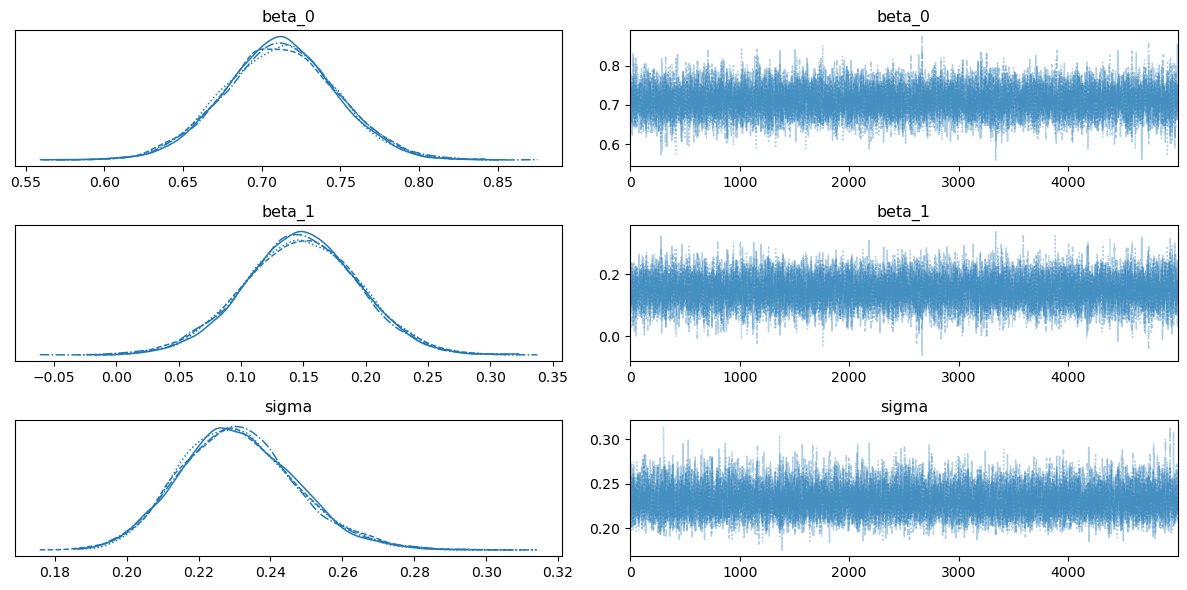

In [5]:
axes = az.plot_trace(trace)
plt.tight_layout()
plt.show()

In [6]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,0.712,0.036,0.644,0.779,0.0,0.0,11213.0,10099.0,1.0
beta_1,0.148,0.046,0.062,0.236,0.0,0.0,11214.0,11808.0,1.0
sigma,0.231,0.016,0.202,0.262,0.0,0.0,12639.0,11744.0,1.0


#### Arviz 实现计算贝叶斯因子

现在，我们有了 $beta_1$ 的先验分布和后验分布，我们分别计算贝叶斯因子 $BF_{10}$ 和 $BF_{01}$，分别表示数据支持备择假设和零假设的证据强度。

在 Python 的 Arviz 库中，`arviz.plot_bf` 函数提供了直接计算贝叶斯因子的方法，并且可以对先验和后验分布在零假设点处的概率密度值进行可视化。

Sampling: [beta_0, beta_1, sigma, y_est]


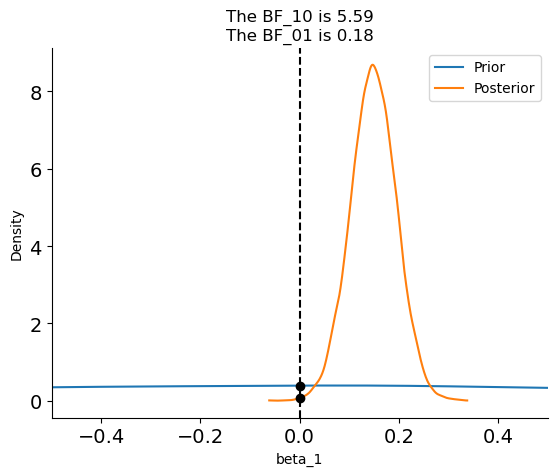

In [7]:
import seaborn as sns

# 进行贝叶斯因子计算，需要采样先验分布
with linear_model:
    trace.extend(pm.sample_prior_predictive(5000, random_seed=84735) )

# 绘制贝叶斯因子图
az.plot_bf(trace, var_name="beta_1", ref_val=0)

# 设置 x 轴的范围
plt.xlim(-0.5, 0.5) 

# 去除上框线和右框线
sns.despine()

通过上图我们可以发现：

1. $BF_{10} = 5.46$：表示数据支持$H_1$的强度相对于$H_0$设为 5.46。
2. $BF_{01} = 0.18$：表示数据支持$H_0$的强度相对于$H_1$为 0.18。
   
总结：通过贝叶斯因子的计算，对于数据倾向于支持 $\beta_1 \neq 0$，即存在效应提供了中等强度的证据。

#### 与 JASP 的对比

在 Python 中，我们利用 Arviz 来计算贝叶斯因子，通过直接比较先验和后验分布在零点的密度差异来检验某个效应是否为零。

然而，[JASP（Jeffreys's Amazing Statistics Program）](https://jasp-stats.org/)提供了一种不同的方法来计算贝叶斯因子：

* JASP 是一个基于 R 语言的开源软件，以其易用性和友好的图形界面广受欢迎，主要用于心理学、社会学等领域的统计分析。
* JASP 使用贝叶斯模型来计算贝叶斯因子，包括模型比较和桥采样法（Bridge Sampling）等技术，能够通过计算后验和先验分布的比值，评估不同模型或假设的相对支持程度。与 Savage-Dickey 方法不同，桥采样不局限于单参数或简单假设，因此更适合模型比较和复杂假设检验。

**Python 版本的 JASP 实现**

在 Python 中，虽然没有官方的 JASP API，但我们可以使用 `arviz.compare` 实现类似 JASP 中模型比较的方法来计算贝叶斯因子。

* 需要注意的是，要计算贝叶斯因子，需要获得模型的边际似然（Marginal Likelihood），即模型中所有参数的联合似然。
  
* PyMC 提供了 `pm.compute_log_likelihood` 方法，可以计算模型中所有参数的联合似然。

> 在`arviz.compare()`的输出中，没有直接提供贝叶斯因子（BF）的值。贝叶斯因子是用来比较模型的似然（或后验概率）的一种度量，可以通过**权重(weight)** 来间接理解模型的相对优劣，但它不是直接的贝叶斯因子。

> $$\text{BF}_{10} = \frac{\text{weight of model 1}}{\text{weight of model 2}}$$

**注意：由于这里的方法基于模型比较，它更适合模型比较和复杂假设检验，因此和 Savage-Dickey 方法不同。**

<div style="padding-bottom: 30px;"></div>

但可以看到两者结果的结论基本是一致的：$BF_{10}(SD方法)=5.16$；$BF_{10}(模型比较)=10.10$

注意：在JASP的实际运算中，软件会自动调整先验，因此与我们设置的先验不同，计算得到的贝叶斯因子也会有所不同。

In [8]:
# 定义零假设模型（仅包含截距的模型）
with pm.Model() as model_H0:

    beta_0 = pm.Normal("beta_0", mu=5, sigma=2)        
    sigma = pm.Exponential("sigma", 3)                    
    mu = beta_0
    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df['RT_sec'])  
    trace_H0 = pm.sample(draws=5000, tune=1000, chains=4,discard_tuned_samples=True, random_seed=84735)
    pm.compute_log_likelihood(trace_H0)

# 定义备择假设模型（包含截距和斜率的模型）
with pm.Model() as model_H1:
    
    beta_0 = pm.Normal("beta_0", mu=5, sigma=2)        
    beta_1 = pm.Normal("beta_1", mu=0, sigma=1)      
    sigma = pm.Exponential("sigma", 3)                    
    x = pm.MutableData("x", df['Label'])         
    mu = beta_0 + beta_1 * x
    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df['RT_sec'])  
    trace_H1 = pm.sample(draws=5000, tune=1000, chains=4,discard_tuned_samples=True, random_seed=84735)
    pm.compute_log_likelihood(trace_H1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, sigma]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 3 seconds.


Output()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 5 seconds.


Output()

In [9]:
# 计算贝叶斯因子
model_compare = az.compare({"Label": trace_H0, "Null model": trace_H1}, method='BB-pseudo-BMA')
weight_H0 = model_compare.loc["Label", "weight"]
weight_H1 = model_compare.loc["Null model", "weight"]
BF_10 = weight_H1 / weight_H0
print(f"贝叶斯因子 (BF_10): {BF_10}")

贝叶斯因子 (BF_10): 10.215337370446825


### Testing against a null-region

现在，我们证实了$\beta_1 \neq 0$，即自我和他人条件对于反应时间有差异，但这个差异会不会非常小，是否在我们认为可以忽略的区间内呢？


**回顾 ROPE**

* 在之前的课程中，我们讨论过如何使用 HDI 和 ROPE 来进行假设检验。
* 我们假设了 $\beta_1$ 的值在 $[-0.05, 0.05]$ 范围内可以视为实用等效区间，也就是说，
* 如果 $\beta_1$ 落在这个区间内，我们可以认为 self 和 other 条件之间的反应时间差异可以忽略不计，从而在实践上认为两者无显著差异。  

**ROPE 对于贝叶斯因子的意义**

* 在假设检验中，设定一个“零区域”（null region）可以帮助我们定义一个在实际意义上视为“无效”的效果范围。
* 通过设定零区域，我们可以计算先验概率和后验概率，进而计算贝叶斯因子来量化数据对假设的支持强度。
* 我们可以计算 "label" 条件下反应时间差异落在零假设区间之外的先验概率，以及落在零假设区间之内的先验概率，从而得到我们的先验概率比（prior odds）。

$$
BF_{10} = \frac{P(\text{Data} | H_1)}{P(\text{Data} | H_0)} = \frac{P(Data|\beta_1 \notin [-0.05,0.05])}{P(Data|\beta_1 \in [-0.05,0.05])}
$$

<div style="padding-bottom: 30px;"></div>

由于 arviz 没有提供直接计算区间假设检验的方法，因此需要我们自己实现。

根据上面公式，贝叶斯因子由两部分组成：先验概率比 + 后验概率比。

> 参考资料：https://easystats.github.io/bayestestR/articles/bayes_factors.html#testing-against-a-null-region

下面我们先计算先验概率比。

In [10]:
def calculate_odds(tace_samples, region = [-0.05, 0.05]):
    
    # 计算区间 [-0.05, 0.05] 内的样本
    in_range = tace_samples[(tace_samples >= region[0]) & (tace_samples <= region[1])]

    # 计算区间外的样本
    out_of_range = tace_samples[(tace_samples < region[0]) | (tace_samples > region[1])]

    # 计算区间内外的比例
    P_in_range = len(in_range) / len(tace_samples)
    P_out_of_range = len(out_of_range) / len(tace_samples)

    # 计算比率
    ratio = P_out_of_range / P_in_range
    return ratio


In [11]:
prior_samples = trace.prior['beta_1'].values.reshape(-1)

prior_odds = calculate_odds(prior_samples, region=[-0.05, 0.05])

print(f"先验概率比（prior odds）: {prior_odds:.4f}")

先验概率比（prior odds）: 24.0000


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_region(trace_samples, region=[-0.05,0.05], dist_type="Prior", ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    kde = sns.kdeplot(trace_samples, color="black", linewidth=2, ax=ax)

    # 获取核密度估计的曲线数据
    x, y = kde.get_lines()[0].get_data()

    # 高亮 [-0.05, 0.05] 区间的密度
    ax.fill_between(
        x, y,
        where=(x >= region[0]) & (x <= region[1]),
        color="blue",
        alpha=0.3,
        label="Null"
    )

    # 高亮区间之外（替代区域）
    ax.fill_between(
        x, y,
        where=(x < region[0]) | (x > region[1]),
        color="yellow",
        alpha=0.3,
        label="Alternative"
    )

    # 图例和标题
    ax.set_title(f"{dist_type} Distribution with Null Region")
    ax.set_ylabel("Density")
    ax.legend(title=f"{dist_type} regions")

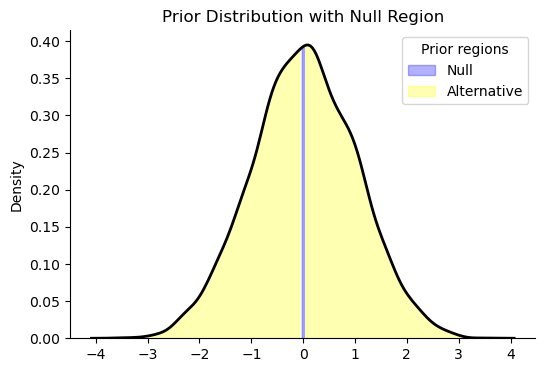

In [13]:
fig, ax = plt.subplots(figsize=(6,4))

plot_region(prior_samples,ax=ax)

sns.despine()

# 显示图形
plt.show()

此时，我们可以通过计算后验概率比（Posterior Odds），评估数据更新后参数值在零假设区间内和区间外的相对支持程度。


In [14]:
posterior_samples = trace.posterior['beta_1'].values.reshape(-1)

posterior_odds = calculate_odds(posterior_samples, region=[-0.05, 0.05])

print(f"后验概率比（posterior odds）: {posterior_odds:.4f}")

后验概率比（posterior odds）: 55.1798


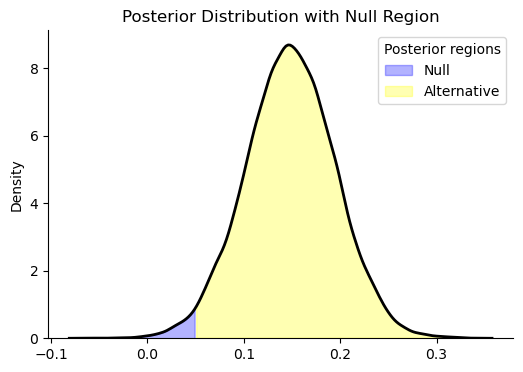

In [15]:
fig, ax = plt.subplots(figsize=(6,4))

plot_region(posterior_samples,dist_type="Posterior", ax=ax)

sns.despine()

# 显示图形
plt.show()

通过先前的贝叶斯因子计算公式，我们可以知道贝叶斯因子为先验概率比和后验概率比的比值：

$$
\begin{align*}
\text{BF}_{10} &= \frac{\text{posterior odds}}{\text{prior odds}} 
\end{align*}
$$


In [16]:
BF_10 = (posterior_odds)/(prior_odds)

print(f"贝叶斯因子（BF 10）: {BF_10:.4f}")

贝叶斯因子（BF 10）: 2.2992



接下来我们将可视化先验和后验分布，从而清晰地展示出数据对零假设区域内外的支持度如何发生了变化：

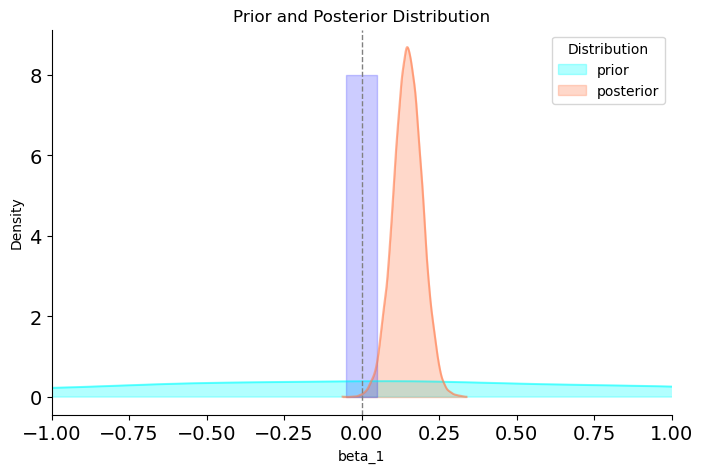

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

# 绘制密度图
plt.figure(figsize=(8, 5))

# 绘制先验分布的密度曲线
az.plot_kde(prior_samples, label="prior", plot_kwargs={"color": "cyan", "alpha": 0.5}, fill_kwargs={"alpha": 0.3})

# 绘制后验分布的密度曲线
az.plot_kde(posterior_samples, label="posterior", plot_kwargs={"color": "coral", "alpha": 0.6}, fill_kwargs={"alpha": 0.3})

# 添加一条垂直虚线，表示零效应参考值（0）
plt.axvline(0, color="grey", linestyle="--", linewidth=1)

# 标注零假设区域
plt.fill_betweenx([0, 8], -0.05, 0.05, color="blue", alpha=0.2) 

# 设置x轴范围
plt.xlim(-1,1)

# 设置图例和标签
plt.legend(title="Distribution", loc="upper right")
plt.xlabel("beta_1")
plt.ylabel("Density")
plt.title("Prior and Posterior Distribution")

# 移除顶部和右侧边框
sns.despine()

# 显示图形
plt.show()

总结：通过可视化，可以发现先验分布的较大部分在零假设区域内，而后验分布则主要集中在零假设区域外，表明数据对备择假设（即  $\beta_1 \neq 0$）提供了支持，尽管支持的力度相对有限。

同时，通过直接计算贝叶斯因子的结果也可得出：数据提供了 $2.3879$ 倍的证据证明 $\beta_1$ 落在 $[-0.05, 0.05]$ 区间外的概率更大

因此，比值直接计算的结果和可视化的结果基本是一致的，两者都表明数据对备择假设的支持存在，但并不非常强。

### 练习: Directional hypotheses

现在我们知道了数据支持在self和other条件下的反应时间有差异，而我们对于其效应的方向（正向或负向）有先验假设，即在“self”条件下的反应时间更短，

那么我们可以通过Directional hypotheses 检验效应是否朝着我们预期的方向发展，计算方向假设（“单侧”）的贝叶斯因子。

在本例中，我们希望测试的是在“self”条件下的反应时间是否比“other”条件更短，因此备择假设将限制在零假设（点或区间）的左侧区域，即更倾向负向的效果。

那么 $H_1$: $\beta_1 < 0$ 表示“self”条件下反应时间较短的情况。

思考🤔：如何通过贝叶斯因子量化支持该假设的相对证据强度呢?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

# 请直接运行，无需修改
def calculate_odds(tace_samples, region = [-0.05, 0.05]):
    
    # 计算区间 [-0.05, 0.05] 内的样本
    in_range = tace_samples[(tace_samples >= region[0]) & (tace_samples <= region[1])]

    # 计算区间外的样本
    out_of_range = tace_samples[(tace_samples < region[0]) | (tace_samples > region[1])]

    # 计算区间内外的比例
    P_in_range = len(in_range) / len(tace_samples)
    P_out_of_range = len(out_of_range) / len(tace_samples)

    # 计算比率
    ratio = P_out_of_range / P_in_range
    return ratio

def plot_region(trace_samples, region=[-0.05,0.05], dist_type="Prior", ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    kde = sns.kdeplot(trace_samples, color="black", linewidth=2, ax=ax)

    # 获取核密度估计的曲线数据
    x, y = kde.get_lines()[0].get_data()

    # 高亮 [-0.05, 0.05] 区间的密度
    ax.fill_between(
        x, y,
        where=(x >= region[0]) & (x <= region[1]),
        color="blue",
        alpha=0.3,
        label="Null"
    )

    # 高亮区间之外（替代区域）
    ax.fill_between(
        x, y,
        where=(x < region[0]) | (x > region[1]),
        color="yellow",
        alpha=0.3,
        label="Alternative"
    )

    # 图例和标题
    ax.set_title(f"{dist_type} Distribution with Null Region")
    ax.set_ylabel("Density")
    ax.legend(title=f"{dist_type} regions")

In [ ]:
#=====================================
#      基于方向的贝叶斯因子计算
#      自行练习
#=====================================

# 获取 beta_1的先验分布的采样
# beta_1_prior = ...


# 获取 beta_1的后验分布的采样
# beta_1_posterior = ...

In [ ]:
# 定义区间
from math import inf

# region = ...

# 计算先验比

# prior_odds = ...

# 计算后验比
# prior_odds = ...

# 计算贝叶斯因子
# prior_odds = ...

print("bayes_factor:", bayes_factor)

In [ ]:
# 最后检查结果，前面部分的代码运行无误后，请直接运行该代码块

# 绘制密度图
plt.figure(figsize=(8, 5))

# 绘图
az.plot_kde(beta_1_prior, label="prior", plot_kwargs={"color": "cyan", "alpha": 0.5}, fill_kwargs={"alpha": 0.3})

az.plot_kde(beta_1_posterior, label="posterior", plot_kwargs={"color": "coral", "alpha": 0.6}, fill_kwargs={"alpha": 0.3})

# 添加垂直虚线
plt.axvline(0, color="grey", linestyle="--", linewidth=1)

# 标注零假设区域
plt.fill_betweenx([0, 8], -1, 0, color="blue", alpha=0.2) 

plt.xlim(-1,1)

# 设置图例和标签
plt.legend(title="Distribution", loc="upper right")
plt.xlabel("beta_1")
plt.ylabel("Density")
plt.title("Prior and Posterior Distribution")

sns.despine()

plt.show()

## 总结
贝叶斯因子较传统统计方法有很多优势，其中最突出的优势是对零假设和备择假设一视同仁。这一方面能够帮助研究者解决为零假设提供证据的问题，另一 方面还能帮助研究者拓宽思路，如本节课介绍了三种贝叶斯因子的计算与应用。

与传统的 $p$ 值不同，贝叶斯因子不仅能够告诉我们是否拒绝零假设，还能展示数据支持哪一个假设的证据强度。

最后，请大家不要谨慎看待 $p$ 值，$p$ 值并不教你相信/不相信什么，而只是为你修正自己的信念提供参考。


## 第二次小作业

1. 针对选课同学：个人作业，每人会有相对应的被试编号数据，会将对应的被试编号信息发到班级qq群
    - 评分方式：人工评审，70分为及格分，100分为满分
    - 截止时间：11月30号12点前
    - 提交方式：仅需提交notebook文件，作业具体要求请查阅课件，项目以“学号_姓名”的形式进行命名，如“232302013_张三”
    - 其他：有问题咨询课程助教或老师


2. 针对旁听同学：个人作业，自行选择“Kolvoort_2020_HBM_Exp1_Clean.csv”中的单个被试数据进行练习，不用提交